# Car Purchasing Amount Prediction

Car Purchasing Amount Prediction using RandomForestRegressor

__Importing Libraries__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

__Loading the Dataset__

In [3]:
data = pd.read_csv(r'Car_Purchasing_Data.csv')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


__Features of the Dataset__

- __Customer Name:__ This column likely contains the names of the customers. It identifies each individual uniquely or may serve as a reference for the customer.

- __Customer e-mail:__ This column likely contains the email addresses of the customers. It's a unique identifier for each customer's email.

- __Country:__ This column probably indicates the country in which the customer resides. It provides geographical information about the customer.

- __Gender:__ This column likely represents the gender of each customer. It could be categorized as 'Male' or 'Female' or use numerical encoding like '0' for Male and '1' for Female.

- __Age:__ This column likely represents the age of each customer. It provides information about the demographic distribution of the customers.

- __Annual Salary:__ This column probably contains the annual salary of each customer. It gives an indication of the financial status of the customer.
- __Credit Card Debt:__ This column likely represents the amount of credit card debt that each customer has. It provides information about the financial liabilities of the customers.

- __Net Worth:__ This column probably represents the net worth of each customer. It could include assets minus liabilities and provides an overall measure of the customer's wealth.

- __Car Purchase Amount:__ This column is likely the target variable in a machine learning context. It represents the amount spent by each customer on a car purchase. This is the variable you might want to predict based on the other features in the dataset.

In [4]:
data.shape #Checking the shape of the dataset

(500, 9)

In [5]:
data.info() #Checking information of data for the dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [6]:
data.isna().sum() #Checking for null values

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [7]:
data['Country'].value_counts() 

Country
USA    500
Name: count, dtype: int64

In [8]:
data['Gender'].value_counts()

Gender
1    253
0    247
Name: count, dtype: int64

There are 253 males and 247 females in tnis data

In [9]:
data['Age'].unique() #Unique ages

array([42, 41, 43, 58, 57, 47, 50, 53, 44, 48, 55, 45, 52, 59, 46, 40, 28,
       56, 33, 51, 22, 38, 39, 61, 37, 34, 32, 49, 36, 30, 35, 54, 62, 60,
       63, 70, 64, 65, 29, 27, 31, 20, 25], dtype=int64)

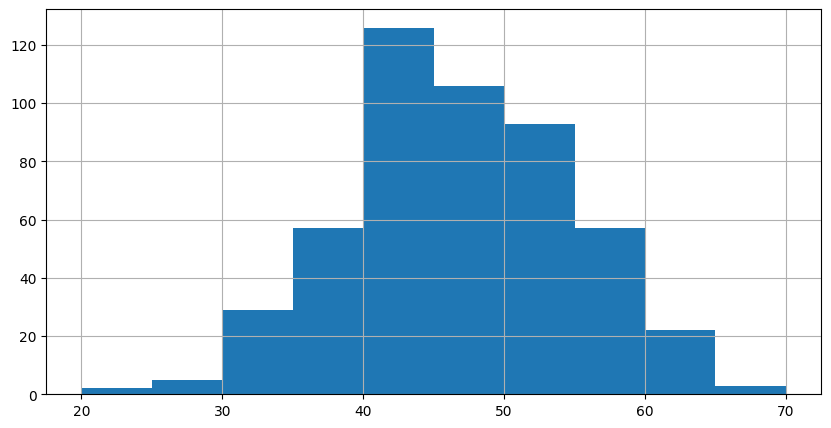

In [10]:
data['Age'].hist(figsize=(10,5))
plt.show()

<Axes: >

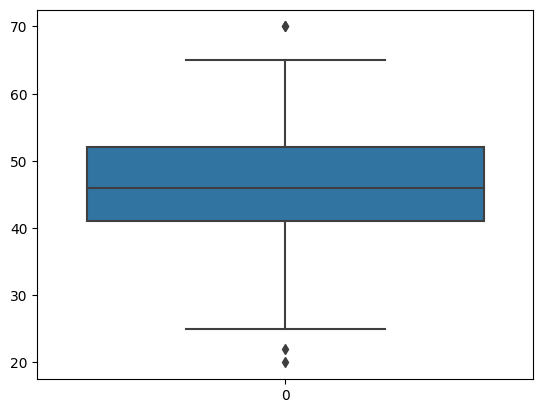

In [11]:
sb.boxplot(data.Age)

<BarContainer object of 500 artists>

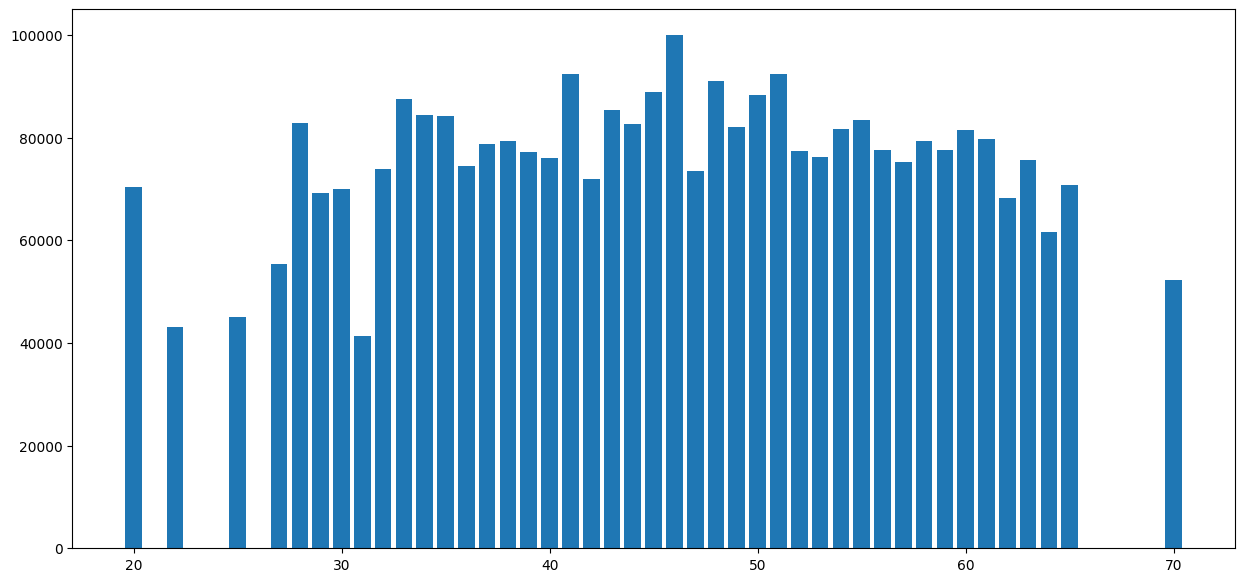

In [12]:
plt.figure(figsize=(15,7))
plt.bar(data['Age'],data['Annual Salary'])

<BarContainer object of 500 artists>

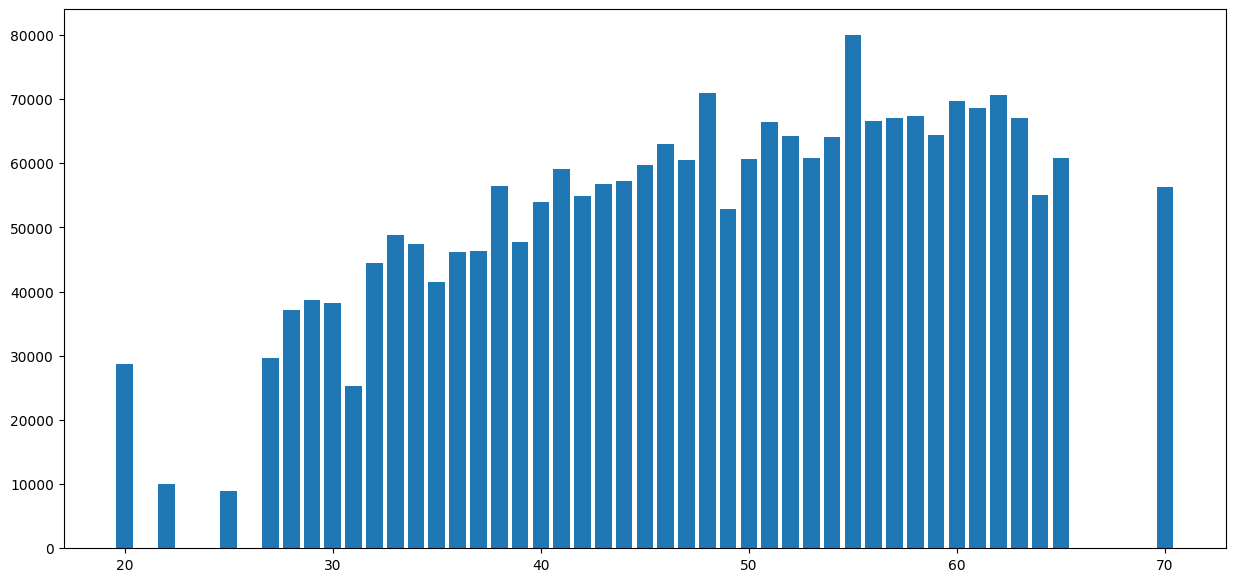

In [13]:
plt.figure(figsize=(15,7))
plt.bar(data['Age'],data['Car Purchase Amount'])

In [14]:
f = data.loc[data['Gender']==0]

<Axes: xlabel='Car Purchase Amount', ylabel='Count'>

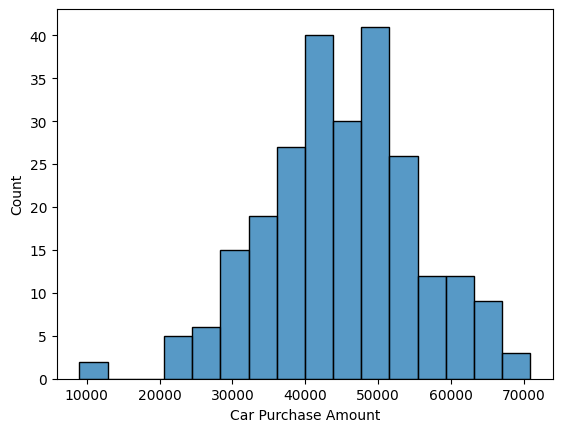

In [15]:
sb.histplot(data=f,x='Car Purchase Amount')

In [16]:
m = data.loc[data['Gender']==1]

<Axes: xlabel='Car Purchase Amount', ylabel='Count'>

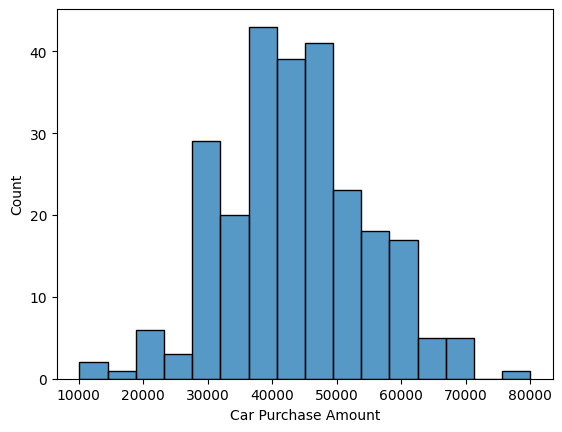

In [17]:
sb.histplot(data=m,x='Car Purchase Amount')

**Model Building**

In [18]:
X = data.drop(['Customer Name','Customer e-mail','Country','Car Purchase Amount'],axis=1)
Y = data['Car Purchase Amount']

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.22,random_state=42)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(390, 5)
(110, 5)
(390,)
(110,)


In [44]:
X_train.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
137,1,48,52534.20778,7583.753853,401955.50100
423,0,43,85475.64202,13786.149420,267555.11780
335,0,61,51086.88482,12254.539430,59630.07789
25,0,53,53065.57175,17805.576070,429440.32970
464,0,53,59297.41631,9592.433147,567842.12670


In [32]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
n_estimators = [25,50,75,100,125,150,175,200]
max_depth = [3,5,10]
criterion = ['friedman_mse']
parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth}
reg = GridSearchCV(rfr,parameters)
reg.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [33]:
reg.best_params_

{'criterion': 'friedman_mse', 'max_depth': 10, 'n_estimators': 125}

In [34]:
y_predict = reg.predict(X_test)

In [35]:
y_predict

array([44988.47390509, 45143.34774038, 64270.93019722, 34808.8848402 ,
       57347.02921271, 60389.53096689, 50617.60696237, 53869.23081632,
       49946.72993087, 47124.80098586, 36917.10711204, 44292.54218034,
       45105.45897081, 39165.51988701, 41006.86427094, 54023.90884519,
       48770.33406376, 18065.76039755, 58328.59670485, 47611.65129355,
       42544.49938734, 51527.81292601, 51797.44691009, 37996.46608907,
       39831.77076903, 39288.40163854, 62170.27045912, 48236.79791875,
       23676.57810912, 51492.89512308, 55970.51138511, 47937.90906079,
       41318.65955908, 53223.84966632, 41985.75663317, 39170.24954708,
       58847.1781214 , 30579.16014868, 42073.32610555, 40222.14049775,
       53947.50552535, 61024.44966415, 47158.74769024, 38175.91759036,
       52430.43420434, 41798.9223787 , 37408.45784389, 40316.50985619,
       52055.78203873, 47212.63073429, 43346.22000301, 35150.07879722,
       38532.99363365, 42274.68218912, 45551.96583143, 45153.61595292,
      

In [36]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_predict)

0.953515145959848

In [37]:
result = pd.DataFrame(columns=['Actual','Predicted'])
result['Actual'] = Y_test
result['Predicted'] = y_predict
result = result.reset_index()
result['Id'] = result.index

In [38]:
result.head()

,index,Actual,Predicted,Id
0,361,46082.80993,44988.473905,0
1,73,45058.89690,45143.347740,1
2,374,63079.84329,64270.930197,2
3,155,31837.22537,34808.884840,3
4,104,60461.24268,57347.029213,4


[]

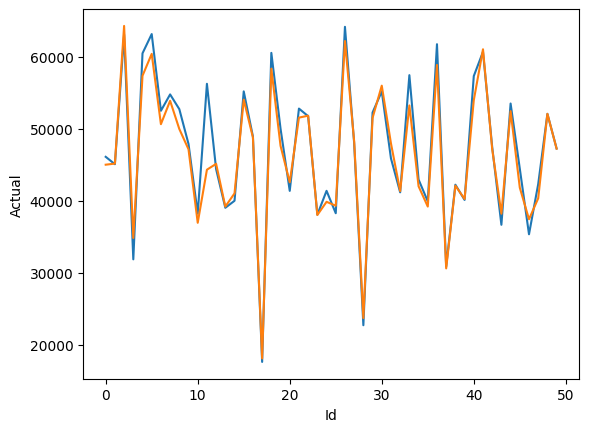

In [39]:
sb.lineplot(x='Id',y='Actual',data=result.head(50)) #Actual - Blue
sb.lineplot(x='Id',y='Predicted',data=result.head(50)) #Predicted - orange
plt.plot()

[]

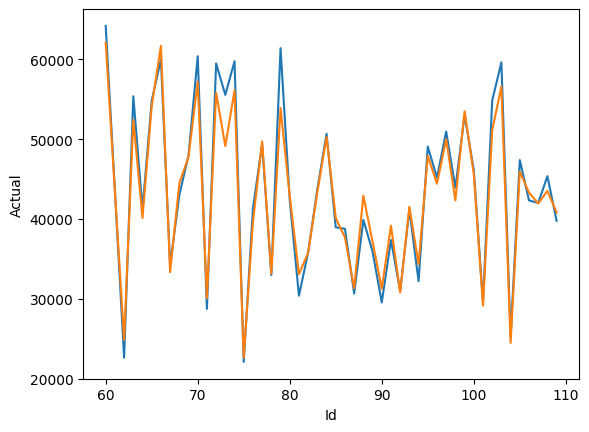

In [40]:
sb.lineplot(x='Id',y="Actual",data=result.tail(50)) #Actual - Blue
sb.lineplot(x='Id',y='Predicted',data=result.tail(50)) #Predicted - Orange
plt.plot()

In [41]:
import pickle

In [45]:
#Saving the model
filename = 'Car_Purchasing_model'
# pickle.dump(reg,open(filename,'wb'))

In [46]:
#Loading the model 
model = pickle.load(open(filename,'rb'))

In [47]:
value = [[0,42,62812,11609,238961]]
pred = model.predict(value)
pred

array([37408.45784389])